## INTRO

A random forest is a collection of decision trees whose results are aggregated into one final result. It creates several decision trees and aggregates the final results. In doing this, the dataset is randomly split into several samples (hence the name "random") and a decision tree is built for each sample, resulting into several trees (hence the name "forest"). 

The ability of random forests to limit overfitting without increasing error due to bias is why they are so powerful.

One way that random forests reduces errors due to variance and bias is by training on different samples of the data. A second way is by using a random subset of features in each decision tree model, e.g. 10 per decision tree model out of a total of 50 features/columns/variables in a dataset.

Random forest is a supervised ML model. One of the biggest advantages of random forest is its versatility. It can be used for both regression (wherein the target variable is numeric and continuous) and classification tasks (wherein the target variable is categorical), and it's also easy to view the relative importance it assigns to the input features.

In this project, we will be using the Random Forest Algorithm for a multinomial classification problem.

## BUSINESS PROBLEM

Given a dataset with handwritten images, we need to classify each of the images to see their categories if they belong to the digits 0 to 9.

#### DATA COLLECTION

In [39]:
# importing relevant libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# We are using the digits dataset from sklearn. This dataset is made up of two sub-datasets - a digits.data 
# (containing only predictor variables/features) and a digits.target (containing only the target variable)
from sklearn.datasets import load_digits    

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset

digits = load_digits()

In [4]:
# taking a peek on the loaded dataset
# .head method was not used since the dataset is a bunch of images andd has not been converted into a pandas
# dataframe

dir(digits)   

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

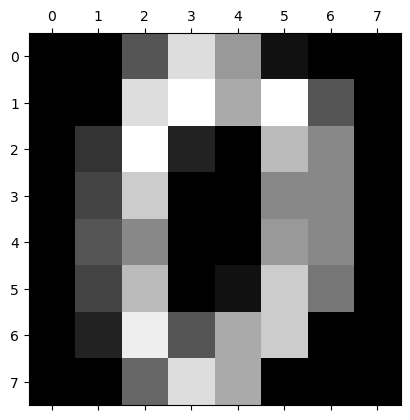

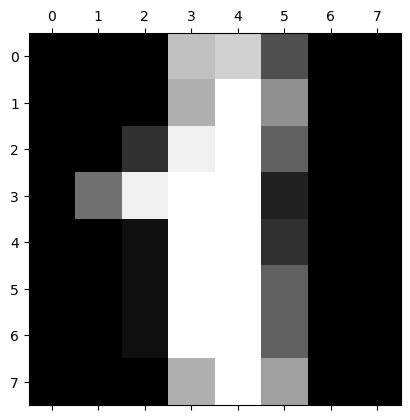

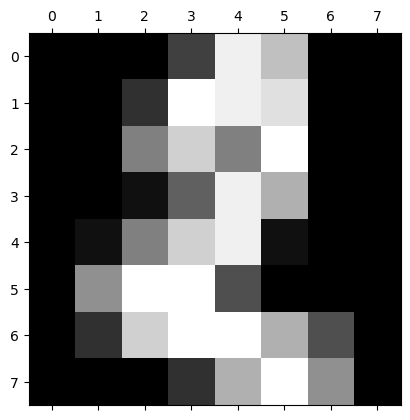

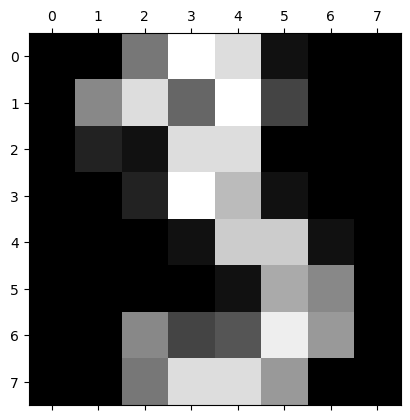

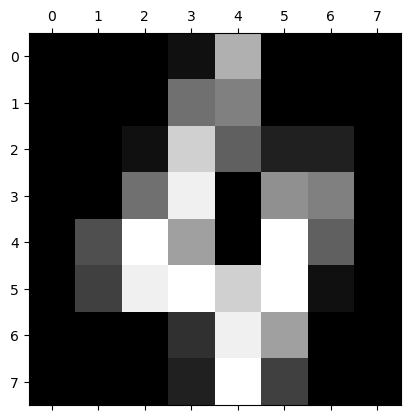

In [4]:
# visualizing to see how our data looks like
plt.gray()
for i in range(5):    # range(5) used to see the first 5 images, just like .head pandas method
    plt.matshow(digits.images[i])
    plt.show()

This gives an idea of how the images look like in the dataset. As can be seen, we have an 8 by 8 multi-dimensional set of images

In [20]:
# converting the digits.data dataset (containing only the features) into a pandas dataframe so we can easily 
# work with it
df = pd.DataFrame(digits.data)

In [21]:
# taking a peek to see if it was properly converted
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
# creating a new column called targets, attaching the column to the features df, and loading the digits.target
# dataset (target variable) into this new column 

df['target'] = digits.target

In [23]:
# Checking to see it worked

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#### DATA ASSESSMENT/CLEANING

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

The dataset is obviously very clean, and this is expected since we got it from sklearn

#### EDA

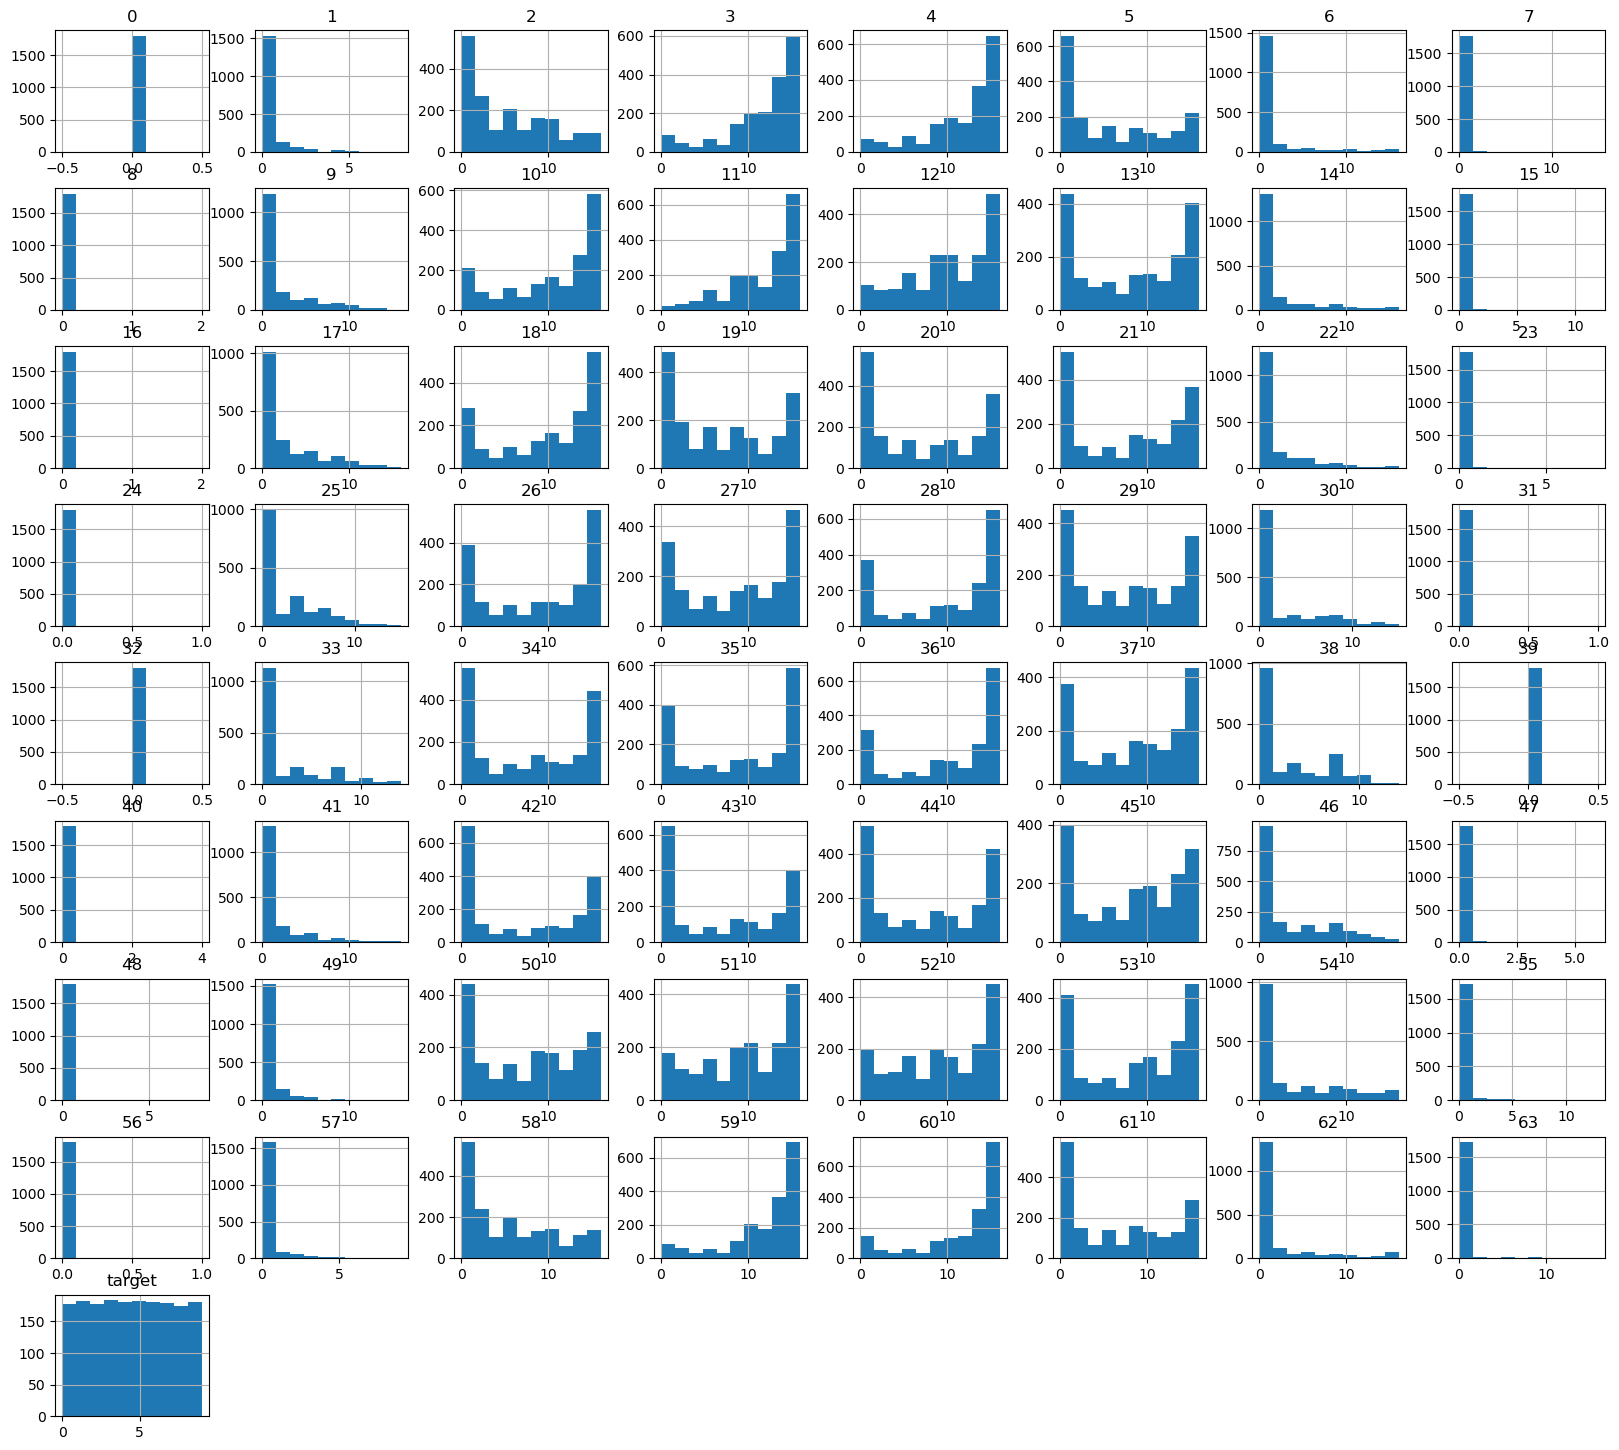

In [25]:
# We plot the histogram of the entire dataframe to check for normal distribution of each of the numeric variables.
# Semi-colon is added at the end of the last line of code to remove unnecessary text usually included with plots.

df.hist(figsize=(20,18));

The results above show that none of the columns are normally distributed, with some being skewed to the right and others to the left, which could be an indication of outliers.

As we have learned in the past, there could be a number of reasons for this, and some supposed outliers may actually be legitimate/valid members of the column. 

Normally, a situation like this would make us explore more to dive deeper to find out the true situation, but since we got this dataset from sklearn, we assume that all of that must have been looked into and all values in the dataset are valid.

#### MODEL BUILDING

Next, we will train our model and make predictions. But before doing so, we will split our dataframe into target and predictor dataframes.

In [26]:
# assigning the target df to y

y = df.target

In [27]:
# creating the predictors df and naming as x by dropping the target column from the main df.

x = df.drop('target', axis = 'columns')   # axis = 1 would also work

In [28]:
# taking a peek

y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [29]:
# taking a peek

x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [30]:
# Next, we will split our dataset into the training and test data. To do this, we will call the
# train_test_split function from sklearn.model_select and pass the x, y, dataframes through it.
# We will set the test size to 0.2, which implies that our model will train on 0.8 or 80% data
# and use 0.2 or 20% to test. Splitting the data into train and test sets is very important to
# prevent overfitting. It also helps us to know how the model will perform on data it has not seen.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state=42)

In [33]:
# instantiating our model with the random forest classifier. The n_estimators parameter
# specifies the number of trees in the forest of the model. The default value for this
# parameter is 10, which means that 10 different decision trees will be constructed in the
# random forest. But we will use 20.

rfc_model = RandomForestClassifier(n_estimators=20, random_state=42)

#### MODEL TRAINING

In [34]:
# passing the train dataset through our model to train it

rfc_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

#### MODEL TESTING

In [36]:
# Now, let's predict with our model

y_pred = rfc_model.predict(x_test)

y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 1, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 9, 2, 9, 4, 4, 7, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 0, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

So, above we see the predictions of the model for each of the images that were given to it. It came up with a number it thinks it is seeing.

But due to the high volume of figures involved here, it may be difficult for us to manually check to see if each of its predictions match with the corresponding actual values in the y_test data (the labels). So, it will help for us to evaluate or score the model.

#### MODEL EVALUATION

In [37]:
rfc_model.score(x_test, y_test)

0.9638888888888889

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9638888888888889


As can be seen, we have an accuracy of 0.96 or 96%

We could adjust the n_estimators parameter (number of trees) and would arrive at a different score or accuracy. This would be especially necessary if we got a low score value, in which case we would continue adjusting the n_estimators value until we arrive at a desired result.